# Tutorial 1 - Getting Started
Simon Matthews (University of Iceland) and Kevin Wong (University of Leeds)

## Introduction

pyMelt is a python package for calculating the melting behaviour of mantle comprising multiple lithologies. The module implements the melting equations developed by Phipps Morgan (2001) to calculate the melting behaviour of mantle comprising any chosen lithology. 

Currently supported calculations:

* Adiabatic decompression melting
* Isobaric melting

Parameters that can be calculated:

* The geotherm for decompressing mantle
* Melt fractions for each lithology
* Crustal thickness for passive-upwelling at a mid-ocean ridge
* Crystallisation temperatures (following the method in Matthews et al., 2016)

## Installing pyMelt
See the github readme or the readthedocs documentation for installation instructions.

once pyMelt is installed, it can be imported:

In [1]:
import pyMelt as m

adding `as m` to the end of the instruction allows us to use the shorthand `m` when accessing the module.

We will also use the `numpy`, `pandas`, and `matplotlib.pyplot` libraries in this tutorial:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Lithology objects
pyMelt offers a number of different lithologies that can be thermodynamically modelled either separately or in combination. pyMelt includes the new parameterisations for KLB-1, KG1, and silica-saturated pyroxenite of Matthews et al., 2021. The lithologies included in the module are:

* ```m.lithologies.matthews.klb1```: KLB-1 lherzolite (Matthews et al., 2021)
* ```m.lithologies.matthews.kg1```: KG1 silica-undersaturated pyroxenite (Matthews et al., 2021)
* ```m.lithologies.matthews.eclogite```: silica-saturated pyroxenite (Matthews et al., 2021)
* ```m.lithologies.shorttle.kg1```: KG1 silica-undersaturated pyroxenite (Shorttle et al. 2014)
* ```m.lithologies.katz.lherzolite```: lherzolite (Katz et al., 2003)
* ```m.lithologies.pertermann.g2```: G2 pyroxenite (Pertermann & Hirschmann, 2002)
* ```m.lithologies.shorttle.harzburgite```: non-melting harzburgite

Each lithology is treated as a python object, and an instance can be assigned to a variable:

In [3]:
lz = m.lithologies.matthews.klb1()
px = m.lithologies.matthews.kg1()
hz = m.lithologies.shorttle.harzburgite()

Each lithology object contains methods describing its thermodynamic properties. Most of these methods are hidden and they vary from model to model, depending on how it is formulated. However, every lithology has the following methods:
* ```TSolidus(P)```: temperature of the lithology solidus (&deg;C) at a given pressure in GPa
* ```TLiquidus(P)```: temperature of the lithology liquidus (&deg;C) at a given pressure in GPa
* ```F(P, T)```: melt fraction of the lithology at a given pressure (GPa) and temperature (&deg;C)
* ```dTdF(P, T)```: dT/dF of the lithology at a constant pressure
* ```dTdP(P, T)```: dT/dP of the lithology at a constant melt fraction
These can be called to get the properties of the lithology at particular temperatures and pressures, for example:

In [4]:
lz_solidus = lz.TSolidus(2.0)
lz_liquidus = lz.TLiquidus(2.0)
lz_F = lz.F(2.0, 1500.0)
print("At 2 GPa the solidus temperature is {:.1f}˚C \n and the liquidus temperature is: {:.1f}˚C. \nAt 1500˚C and 2 GPa the melt fraction is {:.2f}".format(lz_solidus, lz_liquidus, lz_F))

At 2 GPa the solidus temperature is 1397.6˚C 
 and the liquidus temperature is: 1911.3˚C. 
At 1500˚C and 2 GPa the melt fraction is 0.25


Throughout pyMelt the units of temperature are always ˚C, and the units of pressure are always GPa.

We could go one step further and make a plot of the solidus and liquidus temperature for one of the lithologies:

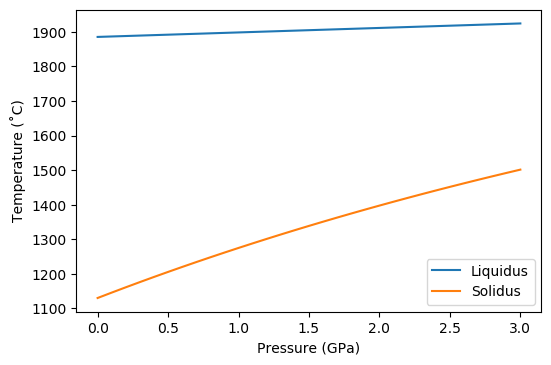

In [5]:
p = np.linspace(0.0,3.0,31)

tliq = np.zeros(np.shape(p))
tsol = np.zeros(np.shape(p))

for i in range(len(p)):
    tliq[i] = lz.TLiquidus(p[i])
    tsol[i] = lz.TSolidus(p[i])

f,a = plt.subplots(dpi=100)
a.plot(p, tliq, label='Liquidus')
a.plot(p, tsol, label='Solidus')
a.set_xlabel('Pressure (GPa)')
a.set_ylabel('Temperature (˚C)')
a.legend()
plt.show()

To see a list of the methods available for any python object, the following can be used within a Jupyter notebook to get access to its documentation.

In [6]:
lz?

Type:        klb1
String form: <pyMelt.lithologies.matthews.klb1 object at 0x7f8f8a988c50>
File:        ~/opt/anaconda3/lib/python3.7/site-packages/pyMelt/lithologies/matthews.py
Docstring:  
Implementation of the KLB1 melting model from Matthews et al. (2021).

To use the same format of parameterisation for another lithology, the parameter values
may be changed. They are provided as a dictionary during initialisation of the class.

- Mcpx:   Mass fraction of cpx in the source. Controls the transition to low-productivity
  harzburgite-type melting.
- A1:     Parameter used to define solidus.
- A2:     Parameter used to define solidus.
- A3:     Parameter used to define solidus.
- A4:               Parameter used to define solidus.
- B1:     Parameter used to define liquidus.
- B2:     Parameter used to define liquidus.
- B3:     Parameter used to define liquidus.
- B4:     Parameter used to define liquidus.
- C:        Parameter used to define lherzolite-liquidus.
- beta1:  Parameter u

## Mantle objects

A ```Mantle``` object is constructed from one or multiple lithologies in specified proportions, and comprises three arguments.

* `lithologies`: a list of the defined lithology objects to be considered in the melting calculation.
* `proportions`: a list of floats (of equivalent length to the list of Argument 1) comprising the relative proportions of the lithologies listed in Argument 1. The floats do not have to be normalised.
* `names`: a list of strings (of equivalent length to the other lists) comprising the names by which the lithologies  will be labelled. These strings will be used in data outputs. This can be ommitted, but the results will be unlabelled.

As a demonstration, we can define a three-component mantle. Note that the code is not limited to three lithologies, and can (in principle) have any number of lithologies:

In [7]:
mantle = m.Mantle([lz, px, hz], [6, 2, 2], ['Lz', 'Px', 'Hz'])

Here are some of the methods that can be called from the ```Mantle``` class:

The bulk thermodynamic properties of the solid mantle can be called:

In [8]:
mantle.bulk_properties()

{'alpha': 40.0, 'CP': 1000.0, 'rho': 3.3}

Does this change once the mantle is molten?

In [9]:
mantle.bulk_properties(T=1400.0, P=2.0)

{'alpha': 42.67799443726366, 'CP': 1000.0, 'rho': 3.261742936610519}

To find out when one of the lithologies will start melting, we can call either the `solid_intersection_isobaric` method if we are interested in a particular pressure, or we can find out at what pressure the mantle will beginning melting during decompression for a given $T_p$ (potential temperature):

In [10]:
mantle.solidus_intersection_isobaric(2.0)

array([1397.57332987, 1292.55257242,           inf])

In [11]:
mantle.solidus_intersection(1450.0)

array([3.16884678, 4.45625687,        nan])

Notice that three values were returned, one for each lithology. Since the third lithology is the non-melting harzburgite from Shorttle et al. (2014), it doesn't have a solidus intersection. If we just wanted to know at what temperature the mantle would start melting, but we didn't care which lithology, we could write:

In [12]:
np.nanmin(mantle.solidus_intersection_isobaric(2.0))

1292.5525724175186

We often talk about mantle temperatures in terms of $T_p$, but sometimes we want to know what temperature this equates to in the solid mantle. The `adiabat` method will do this. To see the required inputs we can use:

In [13]:
mantle.adiabat?

Signature: mantle.adiabat(P, Tp)
Docstring:
Calculates the actual temperature of the solid mantle at a given pressure, given the
potential temperature.

Parameters
----------
P :  float or numpy.array
    Pressure in GPa.
Tp : float or numpy.array
    Potential temperature in degC.

Returns
-------
float or numpy.array
    Temperature of the mantle at the given pressure and Tp.
File:      ~/opt/anaconda3/lib/python3.7/site-packages/pyMelt/mantle_class.py
Type:      method


So we must specify the pressure and temperature. Note that the documentation specifies this will be the temperature of **solid** mantle. The adiabatic path taken by semi-molten mantle must be calculated by running a full decompression melting calculation (see below). 

In [14]:
mantle.adiabat(10.0, 1300.0)

1502.7229412613215

Stepping back into the world of partially-molten mantle, perhaps we want to know the melt fractions of each lithology at a given temperature and pressure. Just like the pure lithology objects, the `F` method will perform this calculation:

In [15]:
mantle.F(2.0, 1400.0)

array([0.00185681, 0.47264287, 0.        ])

## Adiabatic decompression melting
To calculate the consequences of adiabatic decompression melting for this ```Mantle``` object, the method ```AdiabaticMelt_1D``` can be called which will return a new ```column``` object:

In [16]:
column = mantle.AdiabaticMelt_1D(1400.0)

This performed the calculation for a $T_p$ of 1400˚C. The way the calculation is performed can be modified, look up the documentation for the other (optional) arguments.

What is going on behind the scenes? This method performs a simultaneous integration of $\frac{dF}{dP}$ and $\frac{dT}{dP}$ to obtain the thermal gradient through the melting region. The melt fraction $F$ of each lithology is then calculated at the same time. Integration is performed using a fourth-order Runge-Kutta algorithm.

pyMelt provides a built in method `plot` to quickly visualise the results of the calculation.

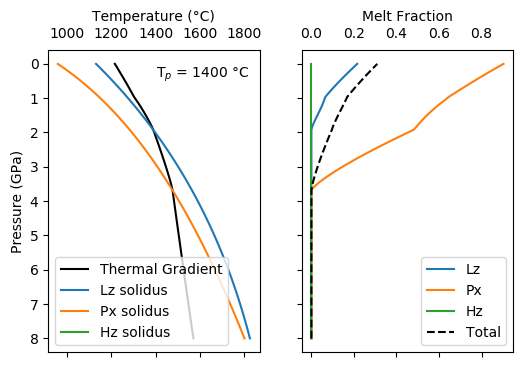

In [17]:
f,a = column.plot()

Often we want to use these results further, however. We can access the results, like temperature:

In [18]:
column.T

0      1570.371819
1      1568.587260
2      1566.804429
3      1565.023324
4      1563.243943
          ...     
96     1246.554443
97     1239.172169
98     1231.719393
99     1224.196800
100    1216.604851
Name: T, Length: 101, dtype: float64

This returned a `pandas.Series` object, with 100 values. To keep the notebook tidy, the printout is automatically truncated. But what pressures do these correspond to?

In [19]:
column.P

0      8.0000
1      7.9201
2      7.8402
3      7.7603
4      7.6804
        ...  
96     0.3296
97     0.2497
98     0.1698
99     0.0899
100    0.0100
Name: P, Length: 101, dtype: float64

What about melt fraction?

In [20]:
column.F

,Lz,Px,Hz
0,0.000000,0.000000,0.0
1,0.000000,0.000000,0.0
2,0.000000,0.000000,0.0
3,0.000000,0.000000,0.0
4,0.000000,0.000000,0.0
...,...,...,...
96,0.161637,0.813019,0.0
97,0.174772,0.834995,0.0
98,0.188123,0.857320,0.0
99,0.201684,0.880025,0.0


This returns a `pandas.DataFrame`, a database-like object. Here we can see the pyroxenite is almost completely molten, but the lherzolite has only achieved 21.5% melting. But what is the aggregate melt fraction? We don't have to calculate this ourselves, pyMelt has already done it for us:

In [21]:
column.F_total

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
96     0.259586
97     0.271862
98     0.284338
99     0.297016
100    0.309896
Length: 101, dtype: float64

The pyroxenite has a sufficiently low abundance that it only contributes a small amount to the aggregate melt fraction.

To save this for further work outside of python, we could construct a `pandas.DataFrame`.

In [22]:
results = pd.DataFrame()

results['T'] = column.T
results['P'] = column.P
results['F_total'] = column.F_total
results['F_lz'] = column.F['Lz']
results['F_px'] = column.F['Px']
results

,T,P,F_total,F_lz,F_px
0,1570.371819,8.0000,0.000000,0.000000,0.000000
1,1568.587260,7.9201,0.000000,0.000000,0.000000
2,1566.804429,7.8402,0.000000,0.000000,0.000000
3,1565.023324,7.7603,0.000000,0.000000,0.000000
4,1563.243943,7.6804,0.000000,0.000000,0.000000
...,...,...,...,...,...
96,1246.554443,0.3296,0.259586,0.161637,0.813019
97,1239.172169,0.2497,0.271862,0.174772,0.834995
98,1231.719393,0.1698,0.284338,0.188123,0.857320
99,1224.196800,0.0899,0.297016,0.201684,0.880025


Calling `results.to_csv('my_results.csv')` will save this as a csv file in your working directory.

## Calculating Crustal Thickness
Crustal thickness can be calculated assuming passive decompression melting in a triangular spreading centre melting region similar to that of a mid-ocean ridge. If this is the case the melt fractions must be integrated over the column using the ```integrate_tri()``` method to return a crustal thickness in km.

In [23]:
column.integrate_tri()

12.76562411169025

This returns the value of the crustal thickness, but it has also added the intermediate results into the column object as the attributes:
* ```dtcdP```: results from Eq(6) (White et al., 1992) for the total melt fraction.
* ```tc_int```: integrated crustal thickness as a function of pressure (up to 0 GPa).
* ```tc_P_int```: pressure exerted by the integrated crustal thickness as a function of pressure (up to 0 GPa).
* ```tc```: integrated crustal thickness at the point where the pressure it exerts is equal to the calculation pressure.
* ```P_base_of_crust```: pressure at the base of the crust, at the point where the pressure the generated crust exerts is equal to the calculation pressure.
* ```tc_lithology_contributions_int```: integrated proportion of generated crust derived from each lithology as a function of pressure.
* ```tc_lithology_contributions``` integrated proportion of generated crust derived from each lithology where the pressure the generated crust exerts is equal to the calculation pressure.

If we want to know how much each lithology contributes to the crust, we can call the `tc_lithology_contributions` attribute:

In [24]:
column.tc_lithology_contributions

array([0.19946515, 0.80053485, 0.        ])

In this case the pyroxenite dominates the accumulated melt.

## Melt liquidus temperature
pyMelt can be used to estimate the liquidus of mantle-derived melts (crystallisation temperature). This is achieved using the ```MeltCrystallisationT()``` method. Triangular integration must have been performed beforehand to achieve a liquidus temperature, else an error will be returned.


In [25]:
column.MeltCrystallisationT()

(1250.7364070896822, 1345.0235786794676)

This function returns two crystallisation temperature estimates, the first for the melts at the top of the melting column (the shallowest melts), and the second for the melts at the bottom of the melting column (the deepest melts). Both cases assume thermal (and chemical) isolation of the melts during ascent.

See Matthews et al. (2016) or Matthews et al. (2021) for more information about this calculation. To recreate the results from Matthews et al. (2021), the lower crystallisation temperature estimate should be used. Check the documentation to see how the parameters of the calculation may be changed.